In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
import zipfile
with zipfile.ZipFile("C:\\Users\\Krish\\Downloads\\archive (3).zip", 'r') as z:
    train_df = pd.read_csv(z.open('fraudTrain.csv'))
    test_df = pd.read_csv(z.open('fraudTest.csv'))

In [3]:
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [5]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [7]:
train_df.shape

(1296675, 23)

In [8]:
test_df.shape

(555719, 23)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [11]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## DATA PREPROCESSING

In [14]:
## removing useless columns

useless_columns = [
    'Unnamed: 0', 'first', 'last', 'street', 'city', 'zip', 
    'cc_num', 'trans_num', 'trans_date_trans_time'
]
train_df = train_df.drop(columns=useless_columns)

In [15]:
train_df

,merchant,category,amt,gender,state,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,UT,37.7175,-112.4777,258,Geoscientist,1961-11-24,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,MD,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,1371816816,42.788940,-103.241160,0


In [16]:
useless_columns1 = [
    'Unnamed: 0', 'first', 'last', 'street', 'city', 'zip', 
    'cc_num', 'trans_num', 'trans_date_trans_time'
]
test_df = test_df.drop(columns=useless_columns)
test_df

,merchant,category,amt,gender,state,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,MO,40.4931,-91.8912,519,Town planner,1966-02-13,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,Musician,1981-11-29,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,1388534364,44.470525,-117.080888,0


In [17]:
train_df = train_df.drop(columns = ['dob'])
train_df

,merchant,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,UT,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,MD,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [18]:
test_df = test_df.drop(columns = ['dob'])
test_df

,merchant,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,MI,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,MO,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,ID,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [19]:
train_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1296670    False
1296671    False
1296672    False
1296673    False
1296674    False
Length: 1296675, dtype: bool

In [20]:
test_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
555714    False
555715    False
555716    False
555717    False
555718    False
Length: 555719, dtype: bool

In [21]:
train_df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'lat', 'long',
       'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## EDA

In [22]:
sns.set(style="whitegrid")

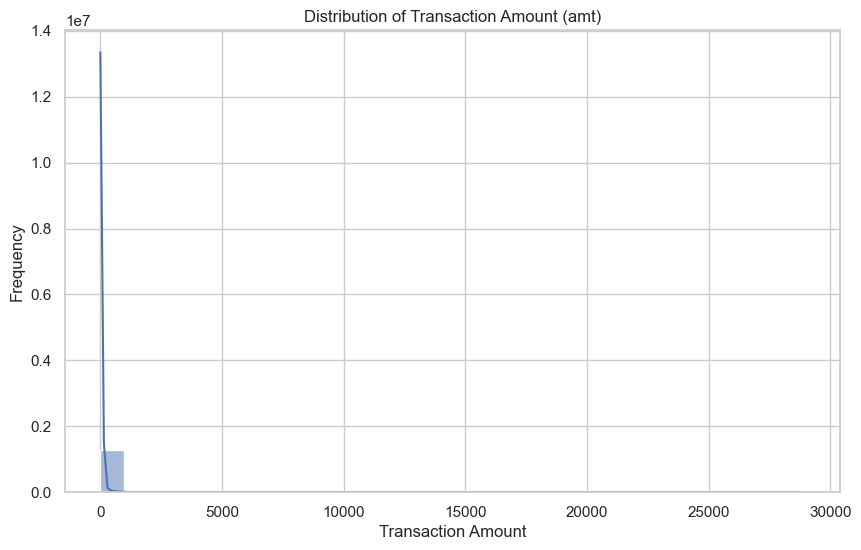

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['amt'], kde=True, bins=30)
plt.title('Distribution of Transaction Amount (amt)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

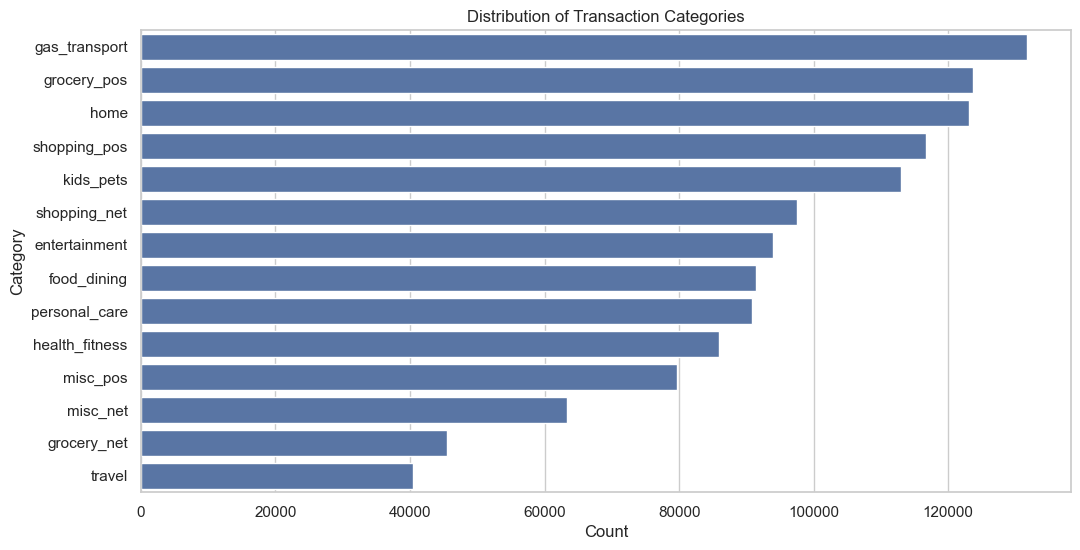

In [24]:
# 2. Distribution of Transaction Categories (category)
plt.figure(figsize=(12, 6))
sns.countplot(y=train_df['category'], order=train_df['category'].value_counts().index)
plt.title('Distribution of Transaction Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

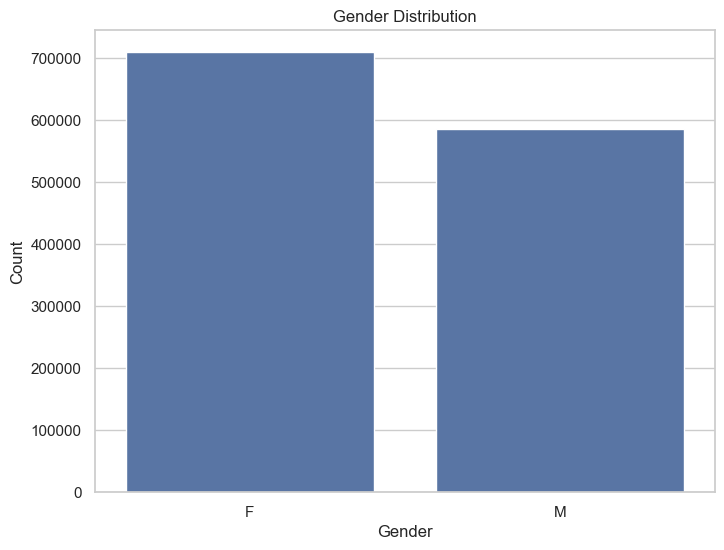

In [25]:
# 3. Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=train_df['gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

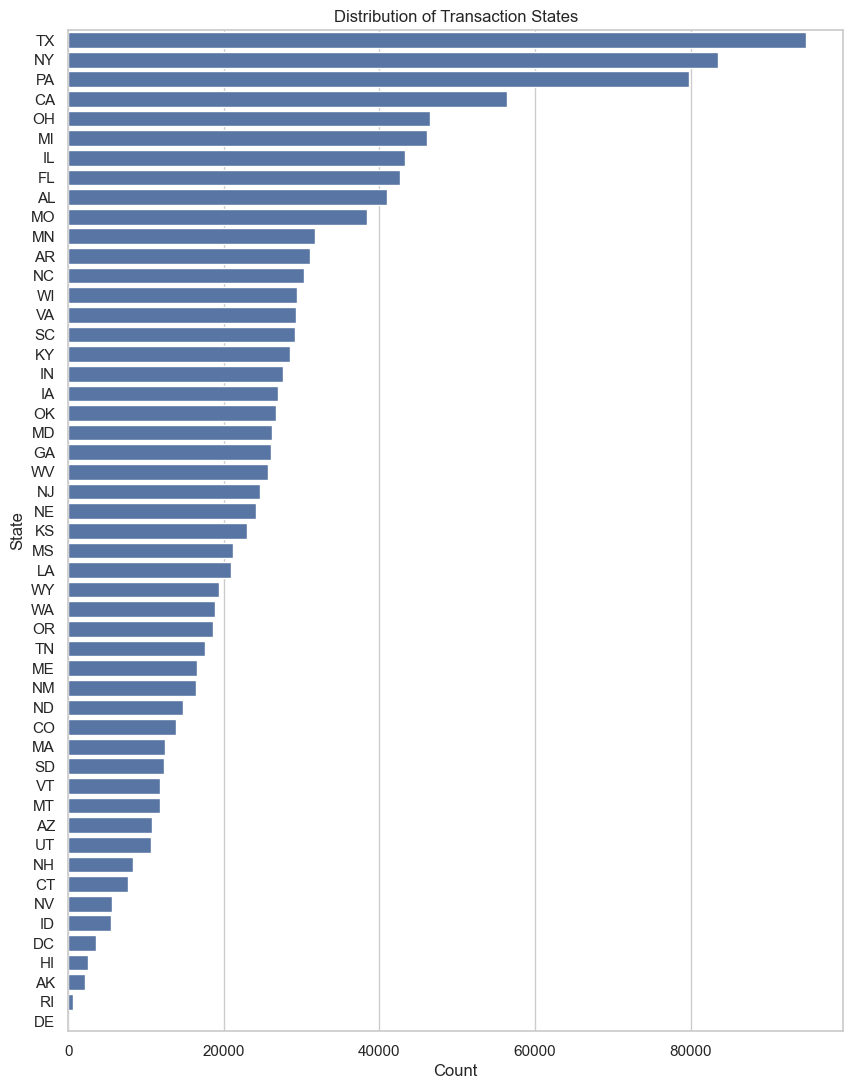

In [26]:
# 4. Distribution of Transaction States (state)
plt.figure(figsize=(10, 13))
sns.countplot(y=train_df['state'], order=train_df['state'].value_counts().index)
plt.title('Distribution of Transaction States')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

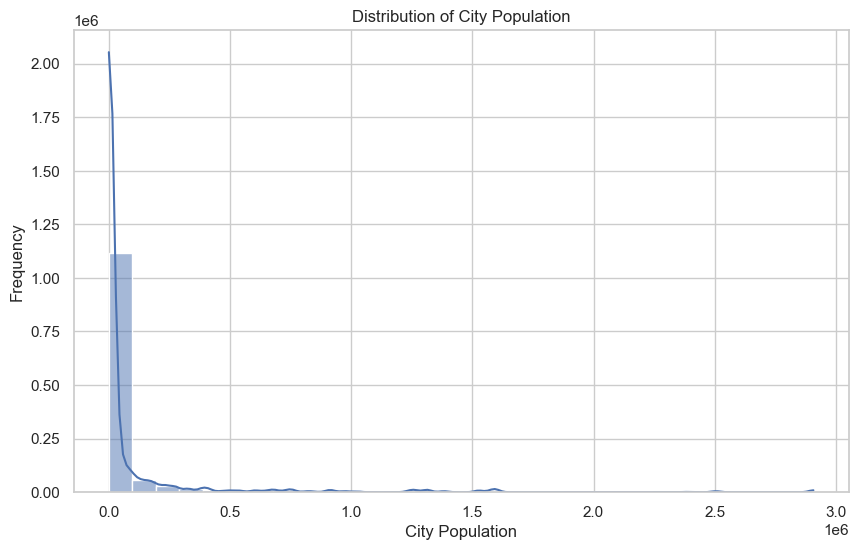

In [27]:
# 5. Distribution of City Population (city_pop)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['city_pop'], kde=True, bins=30)
plt.title('Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Frequency')
plt.show()

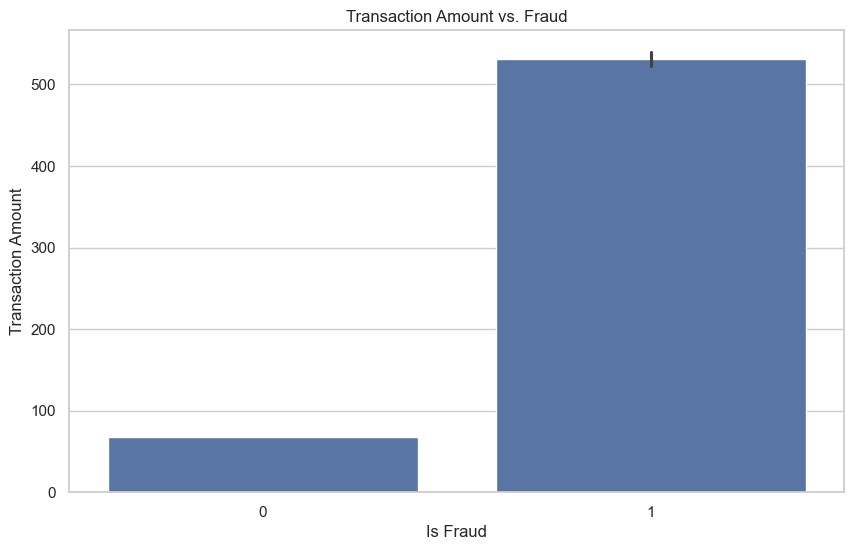

In [28]:
## bivariant analysis
# 1. Transaction Amount vs. Fraud (is_fraud)
plt.figure(figsize=(10, 6))
sns.barplot(x='is_fraud', y='amt', data=train_df)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

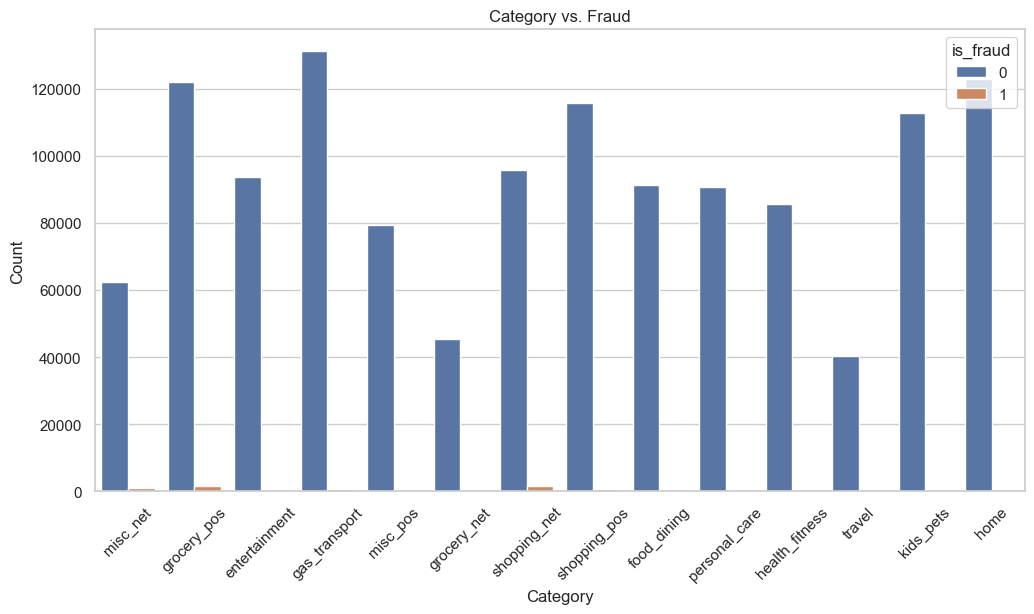

In [29]:
# 2. Category vs. Fraud (is_fraud)
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_df)
plt.title('Category vs. Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

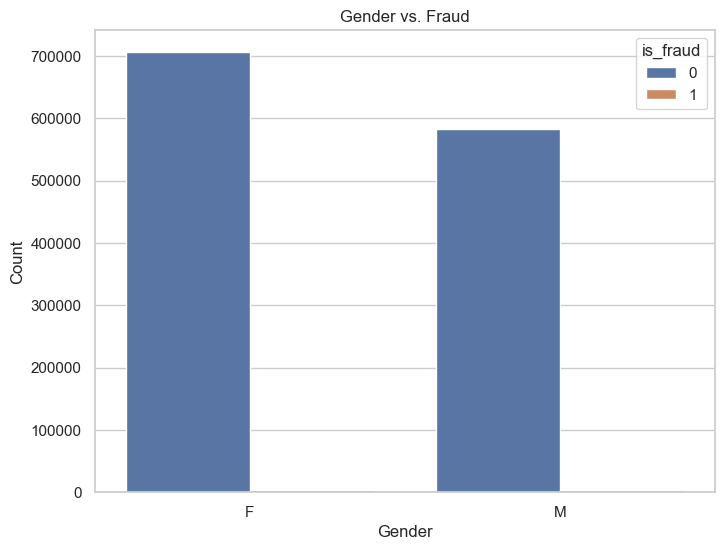

In [30]:
# 3. Gender vs. Fraud (is_fraud)
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_df)
plt.title('Gender vs. Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

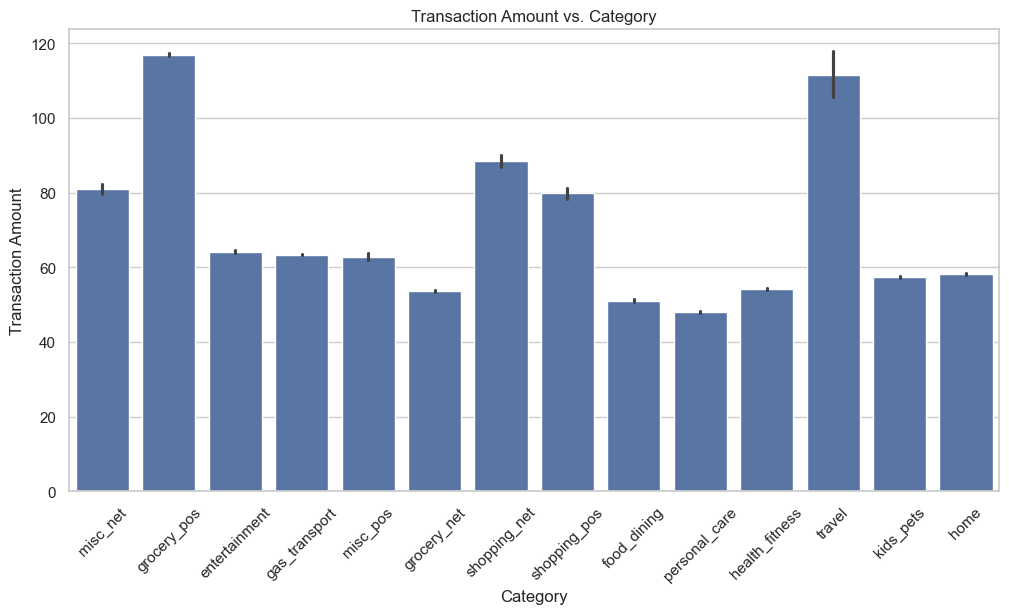

In [31]:
# 4. Transaction Amount vs. Category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='amt', data=train_df)
plt.title('Transaction Amount vs. Category')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

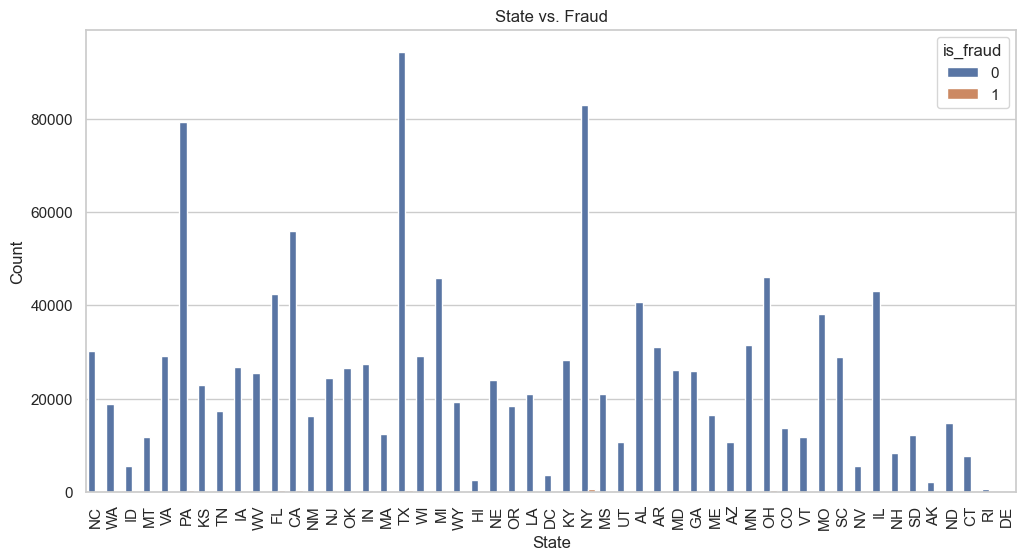

In [32]:
# 5. State vs. Fraud (is_fraud)
plt.figure(figsize=(12, 6))
sns.countplot(x='state', hue='is_fraud', data=train_df)
plt.title('State vs. Fraud')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## FEATURE ENGINEERING

In [33]:
from sklearn.preprocessing import StandardScaler

# Function to calculate distance
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Function to preprocess data
def preprocess_data(df):
    # 1. Distance between Transaction and Merchant
    df['distance'] = calculate_distance(df['lat'], df['long'], df['merch_lat'], df['merch_long'])
    
    # 2. Time-Based Features
    df['trans_time'] = pd.to_datetime(df['unix_time'], unit='s')
    df['hour'] = df['trans_time'].dt.hour
    df['day_of_week'] = df['trans_time'].dt.dayofweek
    df['month'] = df['trans_time'].dt.month
    
   
    # 3. Create Interaction Features
    df['category_amt'] = df['category'].astype(str) + '_' + df['amt'].astype(str)

    return df
    
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

In [34]:
train_df

,merchant,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,distance,trans_time,hour,day_of_week,month,category_amt
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,78.597568,2012-01-01 00:00:18,0,6,1,misc_net_4.97
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,30.212176,2012-01-01 00:00:44,0,6,1,grocery_pos_107.23
2,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,108.206083,2012-01-01 00:00:51,0,6,1,entertainment_220.11
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,95.673231,2012-01-01 00:01:16,0,6,1,gas_transport_45.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,77.556744,2012-01-01 00:03:06,0,6,1,misc_pos_41.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,UT,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0,119.752136,2013-06-21 12:12:08,12,4,6,entertainment_15.56
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,MD,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0,75.104085,2013-06-21 12:12:19,12,4,6,food_dining_51.7
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0,99.047734,2013-06-21 12:12:32,12,4,6,food_dining_105.93
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0,84.627652,2013-06-21 12:13:36,12,4,6,food_dining_74.9


In [35]:
columns_to_drop = ['merchant',	'category',	'lat','long','unix_time','merch_lat','merch_long']
train_df = train_df.drop(columns = columns_to_drop)

In [36]:
train_df

,amt,gender,state,city_pop,job,is_fraud,distance,trans_time,hour,day_of_week,month,category_amt
0,4.97,F,NC,3495,"Psychologist, counselling",0,78.597568,2012-01-01 00:00:18,0,6,1,misc_net_4.97
1,107.23,F,WA,149,Special educational needs teacher,0,30.212176,2012-01-01 00:00:44,0,6,1,grocery_pos_107.23
2,220.11,M,ID,4154,Nature conservation officer,0,108.206083,2012-01-01 00:00:51,0,6,1,entertainment_220.11
3,45.00,M,MT,1939,Patent attorney,0,95.673231,2012-01-01 00:01:16,0,6,1,gas_transport_45.0
4,41.96,M,VA,99,Dance movement psychotherapist,0,77.556744,2012-01-01 00:03:06,0,6,1,misc_pos_41.96
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,M,UT,258,Geoscientist,0,119.752136,2013-06-21 12:12:08,12,4,6,entertainment_15.56
1296671,51.70,M,MD,100,"Production assistant, television",0,75.104085,2013-06-21 12:12:19,12,4,6,food_dining_51.7
1296672,105.93,M,NM,899,Naval architect,0,99.047734,2013-06-21 12:12:32,12,4,6,food_dining_105.93
1296673,74.90,M,SD,1126,Volunteer coordinator,0,84.627652,2013-06-21 12:13:36,12,4,6,food_dining_74.9


In [37]:
columns_to_drop = ['merchant',	'category',	'lat','long','unix_time','merch_lat','merch_long']
test_df = test_df.drop(columns = columns_to_drop)

In [38]:
test_df

,amt,gender,state,city_pop,job,is_fraud,distance,trans_time,hour,day_of_week,month,category_amt
0,2.86,M,SC,333497,Mechanical engineer,0,24.561462,2013-06-21 12:14:25,12,4,6,personal_care_2.86
1,29.84,F,UT,302,"Sales professional, IT",0,104.925092,2013-06-21 12:14:33,12,4,6,personal_care_29.84
2,41.28,F,NY,34496,"Librarian, public",0,59.080078,2013-06-21 12:14:53,12,4,6,health_fitness_41.28
3,60.05,M,FL,54767,Set designer,0,27.698567,2013-06-21 12:15:15,12,4,6,misc_pos_60.05
4,3.19,M,MI,1126,Furniture designer,0,104.335106,2013-06-21 12:15:17,12,4,6,travel_3.19
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,M,MO,519,Town planner,0,77.026148,2013-12-31 23:59:07,23,1,12,health_fitness_43.77
555715,111.84,M,TX,28739,Futures trader,0,100.074420,2013-12-31 23:59:09,23,1,12,kids_pets_111.84
555716,86.88,F,WA,3684,Musician,0,80.759302,2013-12-31 23:59:15,23,1,12,kids_pets_86.88
555717,7.99,M,ID,129,Cartographer,0,52.933240,2013-12-31 23:59:24,23,1,12,travel_7.99


In [39]:
train_df.dtypes

amt                    float64
gender                  object
state                   object
city_pop                 int64
job                     object
is_fraud                 int64
distance               float64
trans_time      datetime64[ns]
hour                     int32
day_of_week              int32
month                    int32
category_amt            object
dtype: object

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
# train_df = pd.read_csv('path_to_data.csv')  # Load your DataFrame

# Initialize LabelEncoder for categorical columns
le_gender = LabelEncoder()
le_state = LabelEncoder()

# Convert categorical columns to numeric
train_df['gender_encoded'] = le_gender.fit_transform(train_df['gender'])
train_df['state_encoded'] = le_state.fit_transform(train_df['state'])
train_df['job_encoded'] = le_state.fit_transform(train_df['job'])

# Convert datetime to numeric (timestamp)
train_df['trans_time'] = train_df['trans_time'].astype('int64') // 10**9  # Convert to seconds since epoch

# Ensure all numerical columns are of integer type
train_df['trans_time'] = train_df['trans_time'].astype('int32')
train_df['distance'] = train_df['distance'].astype('int32')
train_df['hour'] = train_df['hour'].astype('int32')
train_df['day_of_week'] = train_df['day_of_week'].astype('int32')
train_df['month'] = train_df['month'].astype('int32')

# Convert categorical features to integers
train_df['category_amt_encoded'] = train_df['category_amt'].astype('category').cat.codes

# Drop original categorical columns if needed
train_df = train_df.drop(columns=['gender', 'state', 'category_amt'])


In [41]:
train_df= train_df.drop(columns = ['job'])

In [42]:
train_df

,amt,city_pop,is_fraud,distance,trans_time,hour,day_of_week,month,gender_encoded,state_encoded,job_encoded,category_amt_encoded
0,4.97,3495,0,78,1325376018,0,6,1,0,27,370,144776
1,107.23,149,0,30,1325376044,0,6,1,0,47,428,56811
2,220.11,4154,0,108,1325376051,0,6,1,1,13,307,8955
3,45.00,1939,0,95,1325376076,0,6,1,1,26,328,40377
4,41.96,99,0,77,1325376186,0,6,1,1,45,116,165106
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,258,0,119,1371816728,12,4,6,1,44,215,4775
1296671,51.70,100,0,75,1371816739,12,4,6,1,20,360,31760
1296672,105.93,899,0,99,1371816752,12,4,6,1,32,308,20729
1296673,74.90,1126,0,84,1371816816,12,4,6,1,41,485,34293


In [43]:
train_df.dtypes

amt                     float64
city_pop                  int64
is_fraud                  int64
distance                  int32
trans_time                int32
hour                      int32
day_of_week               int32
month                     int32
gender_encoded            int32
state_encoded             int32
job_encoded               int32
category_amt_encoded      int32
dtype: object

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame
# test_df = pd.read_csv('path_to_test.csv')  # Ensure you have loaded the DataFrame

# Initialize LabelEncoder for categorical columns
le_gender = LabelEncoder()
le_state = LabelEncoder()
le_job = LabelEncoder()

# Fit LabelEncoder on training data and transform test data
# Fit on train data
le_gender.fit(test_df['gender'])
le_state.fit(test_df['state'])
le_job.fit(test_df['job'])

# Transform test data
test_df['gender_encoded'] = le_gender.transform(test_df['gender'])
test_df['state_encoded'] = le_state.transform(test_df['state'])
test_df['job_encoded'] = le_job.transform(test_df['job'])

# Convert datetime to numeric (timestamp)
test_df['trans_time'] = test_df['trans_time'].astype('int64') // 10**9  # Convert to seconds since epoch

# Ensure all numerical columns are of integer type
test_df['trans_time'] = test_df['trans_time'].astype('int32')
test_df['distance'] = test_df['distance'].astype('int32')
test_df['hour'] = test_df['hour'].astype('int32')
test_df['day_of_week'] = test_df['day_of_week'].astype('int32')
test_df['month'] = test_df['month'].astype('int32')

# Convert categorical features to integers
test_df['category_amt_encoded'] = test_df['category_amt'].astype('category').cat.codes

# Drop original categorical columns if needed
test_df = test_df.drop(columns=['gender', 'state', 'category_amt','job'])


In [45]:
test_df

,amt,city_pop,is_fraud,distance,trans_time,hour,day_of_week,month,gender_encoded,state_encoded,job_encoded,category_amt_encoded
0,2.86,333497,0,24,1371816865,12,4,6,1,39,275,131011
1,29.84,302,0,104,1371816873,12,4,6,0,43,392,132522
2,41.28,34496,0,59,1371816893,12,4,6,0,33,259,68495
3,60.05,54767,0,27,1371816915,12,4,6,1,8,407,124327
4,3.19,1126,0,104,1371816917,12,4,6,1,21,196,166137
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,0,77,1388534347,23,1,12,1,23,460,68731
555715,111.84,28739,0,100,1388534349,23,1,12,1,42,198,89995
555716,86.88,3684,0,80,1388534355,23,1,12,0,46,294,102404
555717,7.99,129,0,52,1388534364,23,1,12,1,12,58,168657


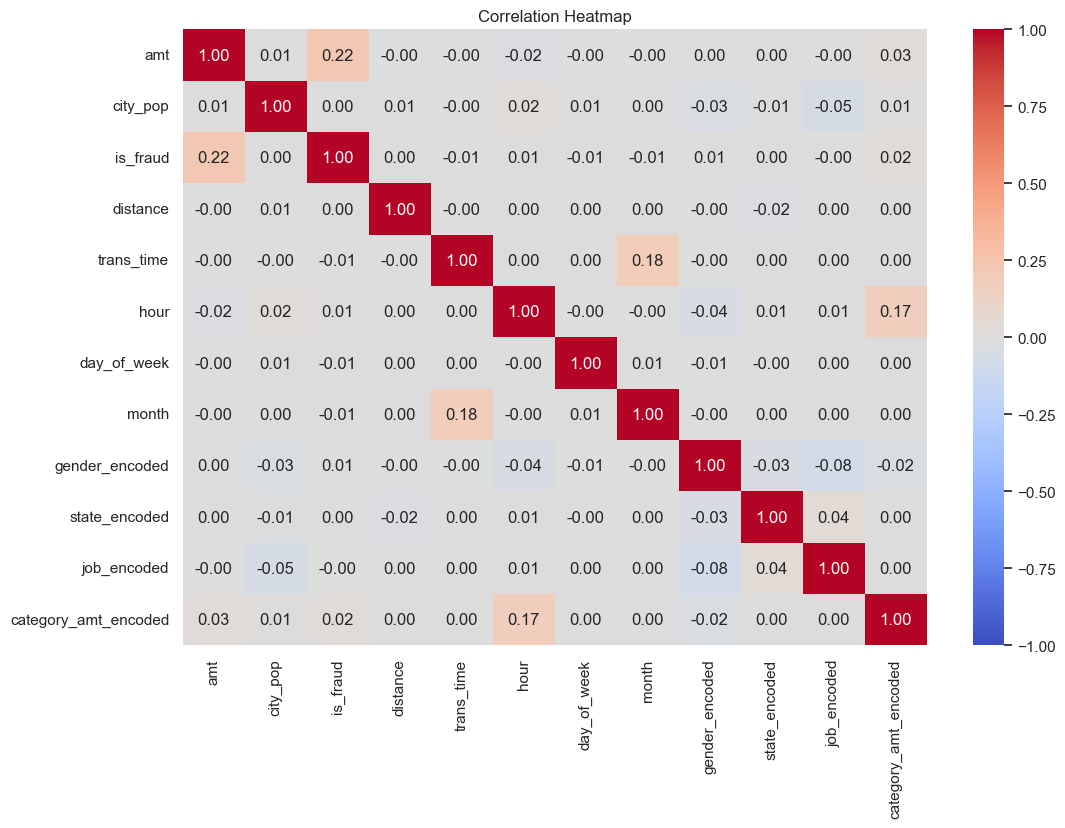

In [46]:
# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
train_df.columns

Index(['amt', 'city_pop', 'is_fraud', 'distance', 'trans_time', 'hour',
       'day_of_week', 'month', 'gender_encoded', 'state_encoded',
       'job_encoded', 'category_amt_encoded'],
      dtype='object')

In [48]:
test_df.columns

Index(['amt', 'city_pop', 'is_fraud', 'distance', 'trans_time', 'hour',
       'day_of_week', 'month', 'gender_encoded', 'state_encoded',
       'job_encoded', 'category_amt_encoded'],
      dtype='object')

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming train_df and test_df are already loaded and preprocessed

# Splitting train_df into features and target
X = train_df.drop(columns=['is_fraud'])
y = train_df['is_fraud']

# Split train_df into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare test_df features (target column 'is_fraud' is not included in test_df)
X_test = test_df.drop(columns=['is_fraud'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert scaled features back to DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Inspect the scaled data
print("Scaled Training Data:")
print(X_train_scaled_df.head())
print("Scaled Validation Data:")
print(X_val_scaled_df.head())
print("Scaled Test Data:")
print(X_test_scaled_df.head())


Scaled Training Data:
        amt  city_pop  distance  trans_time      hour  day_of_week     month  \
0 -0.403002 -0.290721 -0.467202   -0.797429  0.175398    -0.795743 -0.041562   
1 -0.316720 -0.294342  1.215809    0.414847  0.908527    -1.819908  1.713645   
2 -0.217680 -0.213328 -0.398507    1.670817 -0.117854     0.740504 -0.041562   
3 -0.177508 -0.284366  0.013659   -0.599231 -1.730739     0.228421  0.250972   
4 -0.082573  0.130655  1.559280   -0.768040  1.495031     1.252586 -0.041562   

   gender_encoded  state_encoded  job_encoded  category_amt_encoded  
0       -0.908483      -0.606789    -1.086335              1.799089  
1       -0.908483       1.417489     0.990857             -1.531322  
2       -0.908483       1.138278     0.348426             -0.376233  
3        1.100736      -0.327578     1.226415             -0.922218  
4       -0.908483      -0.885999     1.433420              0.198704  
Scaled Validation Data:
        amt  city_pop  distance  trans_time      hour

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

In [51]:
# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled_df, y_train)
y_val_pred = logistic_reg.predict(X_val_scaled_df)
accuracy_logistic = accuracy_score(y_val, y_val_pred)
report_logistic = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_logistic = confusion_matrix(y_val, y_val_pred)

In [52]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled_df, y_train)
y_val_pred = decision_tree.predict(X_val_scaled_df)
accuracy_decision_tree = accuracy_score(y_val, y_val_pred)
report_decision_tree = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_decision_tree = confusion_matrix(y_val, y_val_pred)

In [53]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled_df, y_train)
y_val_pred = random_forest.predict(X_val_scaled_df)
accuracy_random_forest = accuracy_score(y_val, y_val_pred)
report_random_forest = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_random_forest = confusion_matrix(y_val, y_val_pred)

In [54]:
# Extra Trees
extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_train_scaled_df, y_train)
y_val_pred = extra_trees.predict(X_val_scaled_df)
accuracy_extra_trees = accuracy_score(y_val, y_val_pred)
report_extra_trees = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_extra_trees = confusion_matrix(y_val, y_val_pred)

In [55]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_scaled_df, y_train)
y_val_pred = gradient_boosting.predict(X_val_scaled_df)
accuracy_gradient_boosting = accuracy_score(y_val, y_val_pred)
report_gradient_boosting = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_gradient_boosting = confusion_matrix(y_val, y_val_pred)

In [ ]:
# SVM
svm = SVC(probability=True)
svm.fit(X_train_scaled_df, y_train)
y_val_pred = svm.predict(X_val_scaled_df)
accuracy_svm = accuracy_score(y_val, y_val_pred)
report_svm = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_svm = confusion_matrix(y_val, y_val_pred)

In [ ]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled_df, y_train)
y_val_pred = naive_bayes.predict(X_val_scaled_df)
accuracy_naive_bayes = accuracy_score(y_val, y_val_pred)
report_naive_bayes = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_naive_bayes = confusion_matrix(y_val, y_val_pred)

In [ ]:
# Bagging
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
bagging.fit(X_train_scaled_df, y_train)
y_val_pred = bagging.predict(X_val_scaled_df)
accuracy_bagging = accuracy_score(y_val, y_val_pred)
report_bagging = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_bagging = confusion_matrix(y_val, y_val_pred)

In [ ]:
# Voting Ensemble
voting_ensemble = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('et', ExtraTreesClassifier()),
        ('gnb', GaussianNB())
    ],
    voting='soft'
)
voting_ensemble.fit(X_train_scaled_df, y_train)
y_val_pred = voting_ensemble.predict(X_val_scaled_df)
accuracy_voting_ensemble = accuracy_score(y_val, y_val_pred)
report_voting_ensemble = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_voting_ensemble = confusion_matrix(y_val, y_val_pred)

In [ ]:
# XGBoost
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train_scaled_df, y_train)
y_val_pred = xgboost.predict(X_val_scaled_df)
accuracy_xgboost = accuracy_score(y_val, y_val_pred)
report_xgboost = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_xgboost = confusion_matrix(y_val, y_val_pred)

In [ ]:
# LightGBM
lightgbm = lgb.LGBMClassifier()
lightgbm.fit(X_train_scaled_df, y_train)
y_val_pred = lightgbm.predict(X_val_scaled_df)
accuracy_lightgbm = accuracy_score(y_val, y_val_pred)
report_lightgbm = classification_report(y_val, y_val_pred, output_dict=True)
conf_matrix_lightgbm = confusion_matrix(y_val, y_val_pred)

In [ ]:
import pandas as pd

# Compile results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'Gradient Boosting', 'SVM', 
              'Naive Bayes', 'Bagging', 'Voting Ensemble', 'XGBoost', 'LightGBM'],
    'Accuracy': [accuracy_logistic, accuracy_decision_tree, accuracy_random_forest, accuracy_extra_trees, 
                 accuracy_gradient_boosting, accuracy_svm, accuracy_naive_bayes, accuracy_bagging, 
                 accuracy_voting_ensemble, accuracy_xgboost, accuracy_lightgbm],
    'Precision': [report_logistic['weighted avg']['precision'], report_decision_tree['weighted avg']['precision'], 
                  report_random_forest['weighted avg']['precision'], report_extra_trees['weighted avg']['precision'], 
                  report_gradient_boosting['weighted avg']['precision'], report_svm['weighted avg']['precision'], 
                  report_naive_bayes['weighted avg']['precision'], report_bagging['weighted avg']['precision'], 
                  report_voting_ensemble['weighted avg']['precision'], report_xgboost['weighted avg']['precision'], 
                  report_lightgbm['weighted avg']['precision']],
    'Recall': [report_logistic['weighted avg']['recall'], report_decision_tree['weighted avg']['recall'], 
               report_random_forest['weighted avg']['recall'], report_extra_trees['weighted avg']['recall'], 
               report_gradient_boosting['weighted avg']['recall'], report_svm['weighted avg']['recall'], 
               report_naive_bayes['weighted avg']['recall'], report_bagging['weighted avg']['recall'], 
               report_voting_ensemble['weighted avg']['recall'], report_xgboost['weighted avg']['recall'], 
               report_lightgbm['weighted avg']['recall']],
    'F1-Score': [report_logistic['weighted avg']['f1-score'], report_decision_tree['weighted avg']['f1-score'], 
                 report_random_forest['weighted avg']['f1-score'], report_extra_trees['weighted avg']['f1-score'], 
                 report_gradient_boosting['weighted avg']['f1-score'], report_svm['weighted avg']['f1-score'], 
                 report_naive_bayes['weighted avg']['f1-score'], report_bagging['weighted avg']['f1-score'], 
                 report_voting_ensemble['weighted avg']['f1-score'], report_xgboost['weighted avg']['f1-score'], 
                 report_lightgbm['weighted avg']['f1-score']]
})

# Display the summary table
print(results)
